# Physics of falling droplets

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# optional .- run for interactive graphs

%matplotlib notebook

In [3]:
# Constants

mu = 2e-5 # viscosity of air, Pa·s

rho = 1.25 # density of air, kg / m^3

rho_w = 1000  # density of water, kg / m^3

nu = mu / rho  # kinematic viscosity of air

D0 = 5e-6 # interesting diameter, m

v0 = 0.01 # relevant velocity, m/s

g = 9.81 # gravity accel, m/s^2


In [4]:
Re0 = D0 * v0 / nu  # relevant Reynolds number
print(Re0)

0.0031249999999999997


In [5]:
DD = np.logspace( -7 , -2 , 200) # diameter range, in m


In [6]:
Re = DD * v0 / nu # Reynolds number at fixed velocity v0

In [7]:
def terminal(dd):
    return g * (rho_w - rho ) * dd**2 / ( 18 * mu )

In [8]:
term_vel = terminal(DD)

<IPython.core.display.Javascript object>


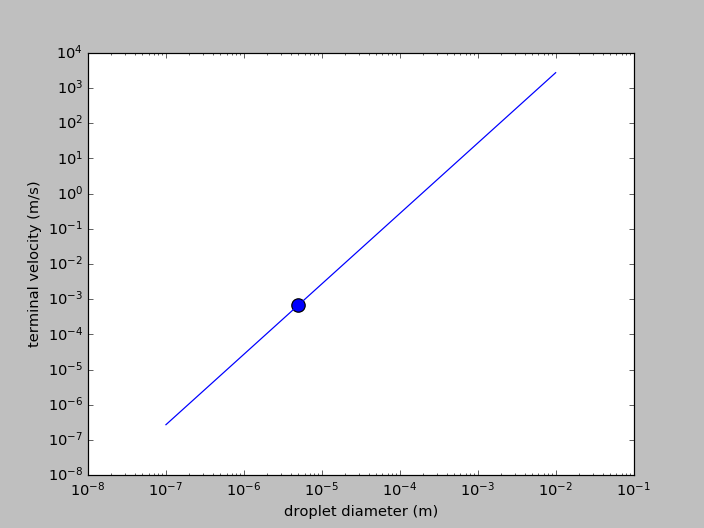

In [9]:
with plt.style.context("classic"):
    fig, ax = plt.subplots()
    ax.loglog( DD , term_vel )
    ax.set_xlabel('droplet diameter (m)')
    ax.set_ylabel('terminal velocity (m/s)')
    plt.scatter( D0 , terminal(D0) , s=120)

In [10]:
H0 = 1.7 # average height of human nose (?), m

time = H0 / term_vel  # (time spent, in s )

<IPython.core.display.Javascript object>


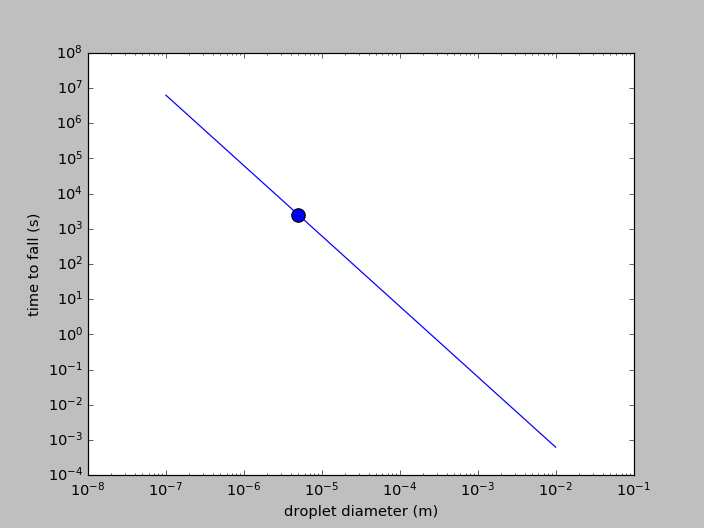

In [11]:
with plt.style.context("classic"):
    fig, ax = plt.subplots()
    ax.loglog( DD  , time)
    ax.set_xlabel('droplet diameter (m)')
    ax.set_ylabel('time to fall (s)')
    plt.scatter( D0, H0/terminal(D0) , s=120)

In [12]:
Re = DD * term_vel / nu

<IPython.core.display.Javascript object>


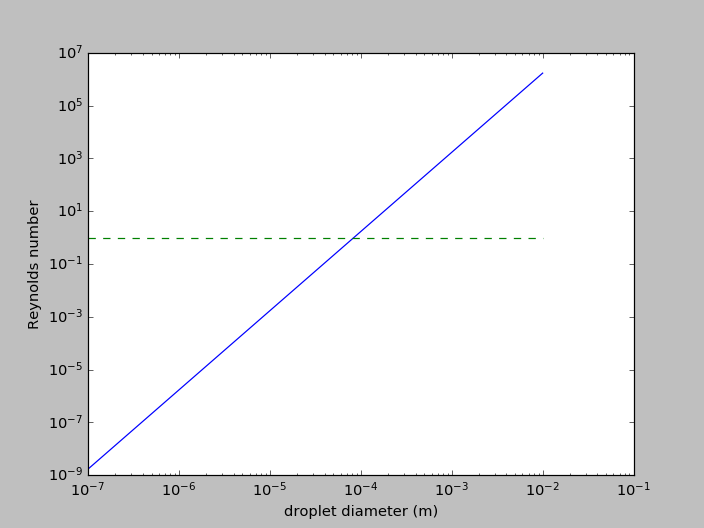

In [13]:
with plt.style.context("classic"):
    fig, ax = plt.subplots()
    ax.loglog( DD , Re )
    ax.loglog( DD , 1 + (DD*0), '--')
    ax.set_xlabel('droplet diameter (m)')
    ax.set_ylabel('Reynolds number')
   

In [14]:
D_cross = 8e-5

In [15]:
def Cf(R):
#    return (24/R)*10**( 0.261 * R**0.369 - 0.105*Re**0.431 - 0.124/(1+np.log(R)**2) ) # Flemmer and Banks
    return (24/R)* ( 1+ 0.173*R ) + \
        + 0.413 / ( 1+ 16300*R**(-1.09) )  # Turton and Levenspiel

<IPython.core.display.Javascript object>


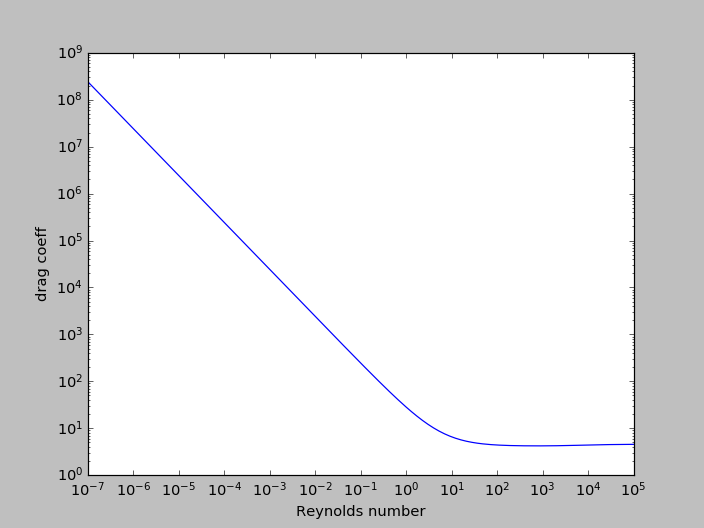

In [16]:
RR = np.logspace( -7 , 5 , 200) # Reynolds number range

with plt.style.context("classic"):
    fig, ax = plt.subplots()
    ax.loglog( RR , Cf(RR) )
    ax.set_xlabel('Reynolds number')
    ax.set_ylabel('drag coeff')


In [18]:
def terminal2(dd ,Cf ):
    return np.sqrt( 4/3 * g * rho_w * DD/ ( Cf * rho ) ) 

In [19]:
term_vel2 =  terminal2( DD , Cf(Re))

<IPython.core.display.Javascript object>


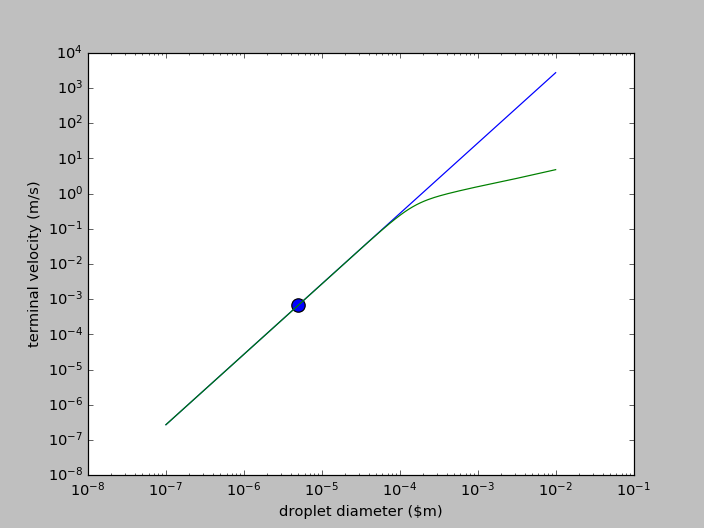

In [20]:
with plt.style.context("classic"):
    fig, ax = plt.subplots()
    ax.loglog( DD  , term_vel )
    ax.loglog( DD , term_vel2 )
    ax.set_xlabel('droplet diameter ($m)')
    ax.set_ylabel('terminal velocity (m/s)')
    plt.scatter( D0  , terminal(D0) , s=120)

In [23]:
time2 = H0 / term_vel2 # (time spent, in s )

<IPython.core.display.Javascript object>


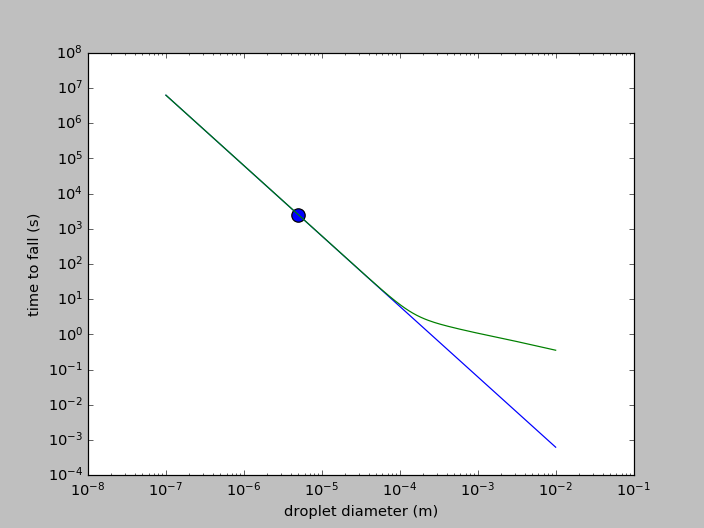

In [24]:
with plt.style.context("classic"):
    fig, ax = plt.subplots()
    ax.loglog( DD  , time  )
    ax.loglog( DD  , time2 )
    ax.set_xlabel('droplet diameter (m)')
    ax.set_ylabel('time to fall (s)')
    plt.scatter( D0, H0/terminal(D0) , s=120)

<IPython.core.display.Javascript object>


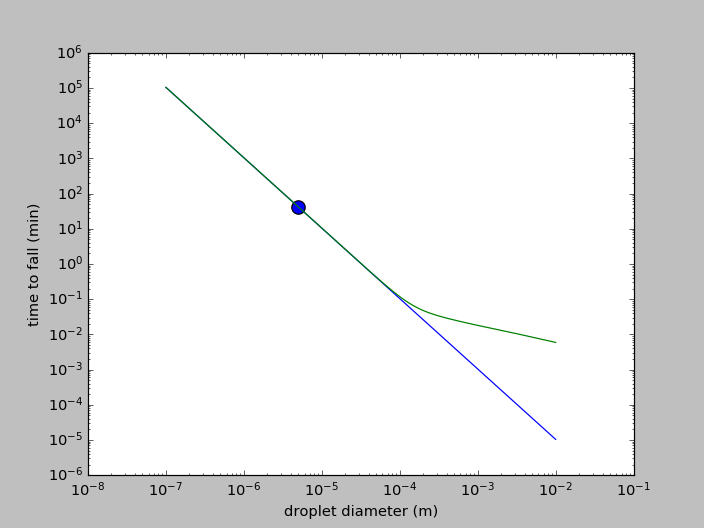

In [26]:
with plt.style.context("classic"):
    fig, ax = plt.subplots()
    ax.loglog( DD  , time /60 )
    ax.loglog( DD  , time2 /60 )
    ax.set_xlabel('droplet diameter (m)')
    ax.set_ylabel('time to fall (min)')
    plt.scatter( D0, H0/terminal(D0)/60 , s=120)